In [1]:
import numpy as np
import pandas as pd
import torch
from torch import nn
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from utils.genre_classification import evaluate, executor, feature_preparator
from utils.genre_classification.random_features_slicer import random_features_slicer
from utils.genre_classification.plot_metrics import plot_metrics
from models.genre_classification.FeedForwardSimpleModel import FeedForwardSimpleModel
from utils.genre_classification.plot_confusion_matrix import plot_confusion_matrix

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
BATCH_SIZE = 64
NUM_CLASSES = 8
DEVICE = torch.device('cuda')

In [4]:
%%time
train_data_loader, val_data_loader, test_data_loader, idx_to_label = feature_preparator(
    'features/genre_classification/mfcc24-zcr-sc-sr-sf-chr.p',
    BATCH_SIZE,
    transform=random_features_slicer,
    normalize=False
)

def transform_idx_to_label(x):
    return idx_to_label[x]

CPU times: user 74.1 ms, sys: 1.07 s, total: 1.14 s
Wall time: 1.14 s


In [5]:
next(iter(train_data_loader))[0].shape

torch.Size([64, 256, 40])

In [6]:
train_labels = []
val_labels = []
test_labels = []

for x, label in train_data_loader:
    train_labels.append(label)

for x, label in val_data_loader:
    val_labels.append(label)

for x, label in test_data_loader:
    test_labels.append(label)

print('Train', np.unique(torch.cat(train_labels).numpy(), return_counts=True))
print('Val', np.unique(torch.cat(val_labels).numpy(), return_counts=True))
print('Test', np.unique(torch.cat(test_labels).numpy(), return_counts=True))
print(idx_to_label)

Train (array([0, 1, 2, 3, 4, 5, 6, 7]), array([1169, 1179, 1174, 1157, 1171, 1178, 1102, 1150]))
Val (array([0, 1, 2, 3, 4, 5, 6, 7]), array([248, 252, 251, 247, 251, 251, 236, 248]))
Test (array([0, 1, 2, 3, 4, 5, 6, 7]), array([250, 254, 250, 248, 250, 253, 232, 247]))
{0: 'Blues', 1: 'Classical', 2: 'Electronic', 3: 'Folk', 4: 'Hip-Hop', 5: 'Jazz', 6: 'Pop', 7: 'Rock'}


 50%|█████     | 50/100 [01:20<01:20,  1.60s/it]

Early stop!


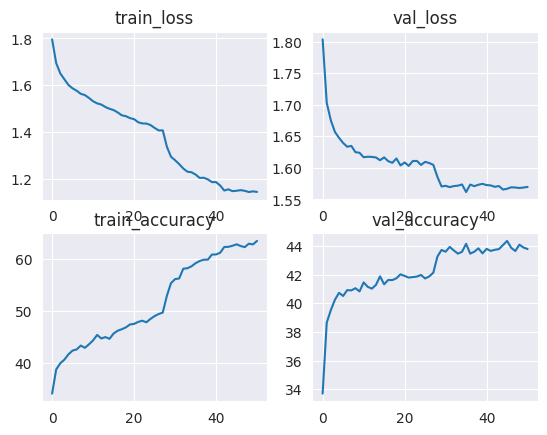

In [7]:
ff_simple_model = FeedForwardSimpleModel(256 * 40, NUM_CLASSES).to(DEVICE)
train_progress, val_progress = executor(DEVICE, ff_simple_model, train_dataloader = train_data_loader, val_dataloader=val_data_loader, epochs=100, learning_rate=0.0001, weight_decay=0.01, evaluate_per_iteration=10, early_stop_after=(15,  0.001))

plot_metrics(train_progress, val_progress, metrics = ['loss', 'accuracy'])

              precision    recall  f1-score   support

       Blues       0.55      0.46      0.50       249
   Classical       0.65      0.68      0.66       254
  Electronic       0.32      0.36      0.34       251
        Folk       0.35      0.32      0.34       247
     Hip-Hop       0.49      0.60      0.54       249
        Jazz       0.35      0.43      0.38       251
         Pop       0.34      0.23      0.28       235
        Rock       0.45      0.42      0.43       248

    accuracy                           0.44      1984
   macro avg       0.44      0.44      0.43      1984
weighted avg       0.44      0.44      0.44      1984



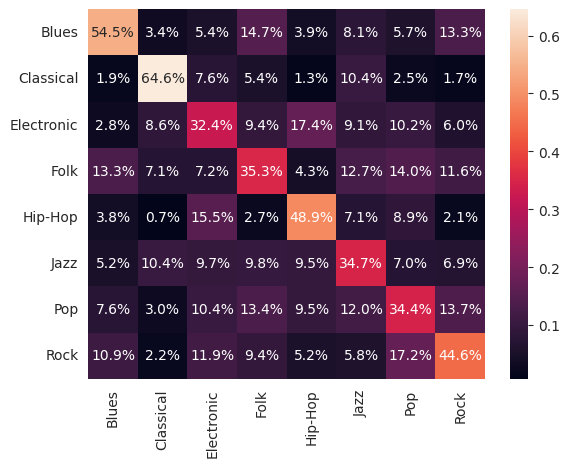

In [11]:
test_loss, test_accuracy, (test_pred, test_true) = evaluate(DEVICE, ff_simple_model, test_data_loader, criterion=nn.CrossEntropyLoss(), return_pred=True)

plot_confusion_matrix(test_true, test_pred, idx_to_label, transform_idx_to_label)

 27%|██▋       | 27/100 [04:12<11:22,  9.35s/it]

Early stop!


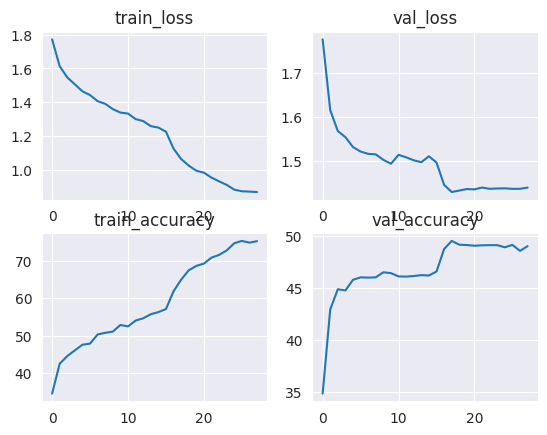

In [9]:
from models.genre_classification.Conv1Model import Conv1Model

conv_1_model = Conv1Model(NUM_CLASSES, time_size=256, feature_size=40).to(DEVICE)
train_progress, val_progress = executor(DEVICE, conv_1_model, train_dataloader = train_data_loader, val_dataloader=val_data_loader, epochs=100, learning_rate=0.0001, weight_decay=0.01, evaluate_per_iteration=10, early_stop_after=(10,  0.01))

plot_metrics(train_progress, val_progress, metrics = ['loss', 'accuracy'])

              precision    recall  f1-score   support

       Blues       0.57      0.50      0.53       249
   Classical       0.65      0.79      0.71       253
  Electronic       0.37      0.41      0.39       250
        Folk       0.42      0.40      0.41       249
     Hip-Hop       0.61      0.65      0.63       251
        Jazz       0.44      0.47      0.46       252
         Pop       0.33      0.27      0.30       234
        Rock       0.50      0.46      0.48       246

    accuracy                           0.49      1984
   macro avg       0.49      0.49      0.49      1984
weighted avg       0.49      0.49      0.49      1984



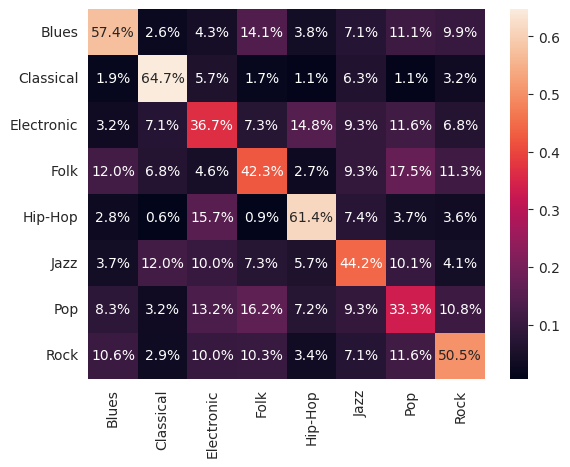

In [10]:
test_loss, test_accuracy, (test_pred, test_true) = evaluate(DEVICE, conv_1_model, test_data_loader, criterion=nn.CrossEntropyLoss(), return_pred=True)

plot_confusion_matrix(test_true, test_pred, idx_to_label, transform_idx_to_label)

 34%|███▍      | 34/100 [03:12<06:13,  5.66s/it]

Early stop!


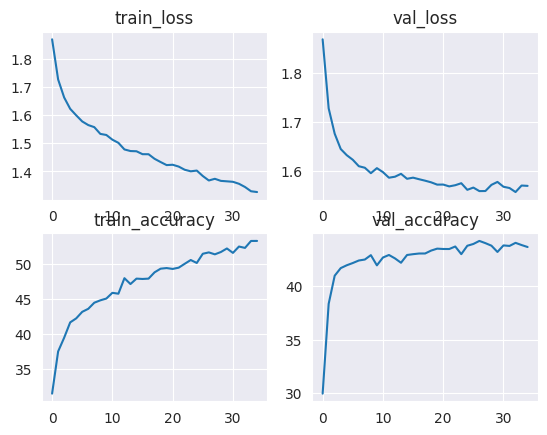

In [12]:
from models.genre_classification.Conv2Model import Conv2Model

conv_2_model = Conv2Model(NUM_CLASSES, 40, 256).to(DEVICE)
train_progress, val_progress = executor(DEVICE, conv_2_model, train_dataloader = train_data_loader, val_dataloader=val_data_loader, epochs=100, learning_rate=0.0001, weight_decay=0.01, evaluate_per_iteration=10, early_stop_after=(10,  0.01))

plot_metrics(train_progress, val_progress, metrics = ['loss', 'accuracy'])

              precision    recall  f1-score   support

       Blues       0.46      0.50      0.48       248
   Classical       0.57      0.72      0.64       254
  Electronic       0.32      0.37      0.34       252
        Folk       0.38      0.38      0.38       246
     Hip-Hop       0.54      0.57      0.56       249
        Jazz       0.37      0.34      0.35       252
         Pop       0.30      0.18      0.22       236
        Rock       0.46      0.43      0.44       247

    accuracy                           0.44      1984
   macro avg       0.43      0.43      0.43      1984
weighted avg       0.43      0.44      0.43      1984



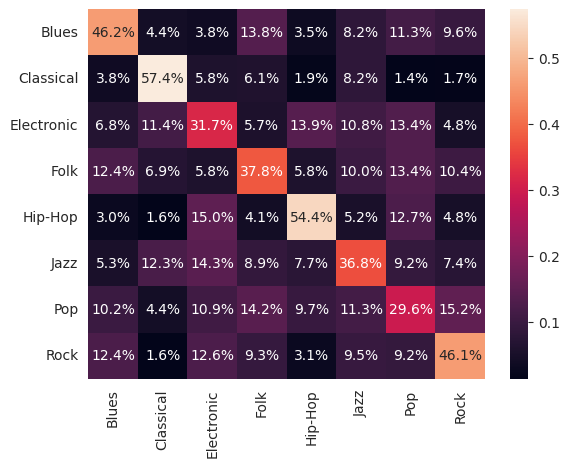

In [13]:
test_loss, test_accuracy, (test_pred, test_true) = evaluate(DEVICE, conv_2_model, test_data_loader, criterion=nn.CrossEntropyLoss(), return_pred=True)

plot_confusion_matrix(test_true, test_pred, idx_to_label, transform_idx_to_label)

 52%|█████▏    | 52/100 [06:23<05:54,  7.38s/it]

Early stop!


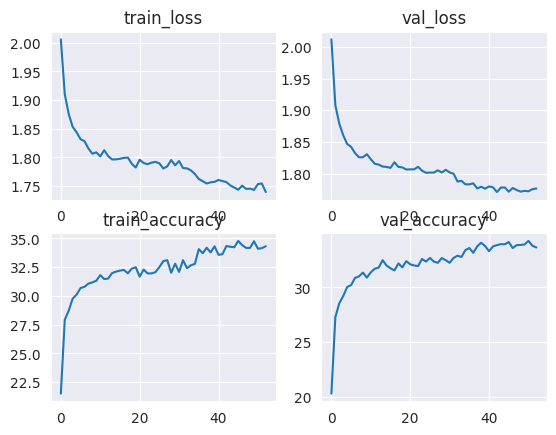

In [14]:
from models.genre_classification.LSTMSimpleModel import LSTMSimpleModel

lstm_simple_model = LSTMSimpleModel(40, 1024, NUM_CLASSES).to(DEVICE)
train_progress, val_progress = executor(DEVICE, lstm_simple_model, train_dataloader = train_data_loader, val_dataloader=val_data_loader, epochs=100, learning_rate=1e-4, weight_decay=0.01, evaluate_per_iteration=10, early_stop_after=(10,  0.001))

plot_metrics(train_progress, val_progress, metrics = ['loss', 'accuracy'])

              precision    recall  f1-score   support

       Blues       0.41      0.35      0.38       248
   Classical       0.50      0.68      0.58       252
  Electronic       0.25      0.21      0.23       252
        Folk       0.23      0.27      0.25       247
     Hip-Hop       0.27      0.38      0.31       250
        Jazz       0.27      0.23      0.25       252
         Pop       0.30      0.06      0.09       235
        Rock       0.34      0.42      0.38       248

    accuracy                           0.33      1984
   macro avg       0.32      0.33      0.31      1984
weighted avg       0.32      0.33      0.31      1984



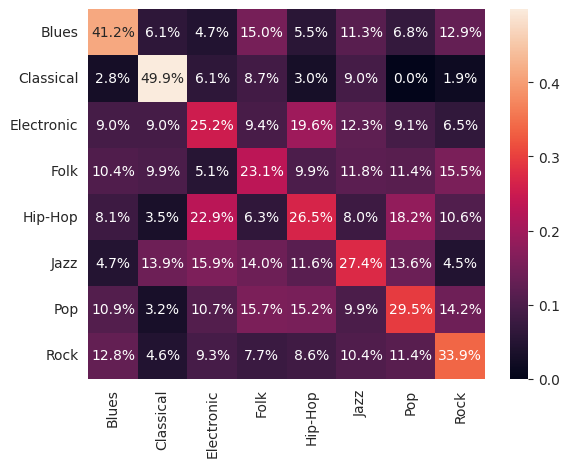

In [17]:
test_loss, test_accuracy, (test_pred, test_true) = evaluate(DEVICE, lstm_simple_model, test_data_loader, criterion=nn.CrossEntropyLoss(), return_pred=True)

plot_confusion_matrix(test_true, test_pred, idx_to_label, transform_idx_to_label)

 45%|████▌     | 45/100 [01:48<02:12,  2.40s/it]

Early stop!


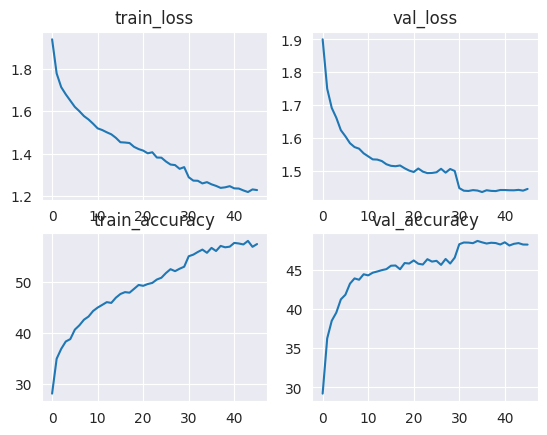

In [40]:
from models.genre_classification.Conv3Model import Conv3Model

conv_3_model = Conv3Model(NUM_CLASSES, 256, 40).to(DEVICE)
train_progress, val_progress = executor(DEVICE, conv_3_model, train_dataloader = train_data_loader, val_dataloader=val_data_loader, epochs=100, learning_rate=0.0001, weight_decay=0.01, evaluate_per_iteration=10, early_stop_after=(10,  0.01))

plot_metrics(train_progress, val_progress, metrics = ['loss', 'accuracy'])

              precision    recall  f1-score   support

       Blues       0.55      0.45      0.49       249
   Classical       0.64      0.75      0.69       254
  Electronic       0.37      0.38      0.38       250
        Folk       0.39      0.43      0.41       248
     Hip-Hop       0.57      0.65      0.61       250
        Jazz       0.40      0.42      0.41       251
         Pop       0.33      0.22      0.26       235
        Rock       0.47      0.48      0.48       247

    accuracy                           0.47      1984
   macro avg       0.46      0.47      0.47      1984
weighted avg       0.47      0.47      0.47      1984



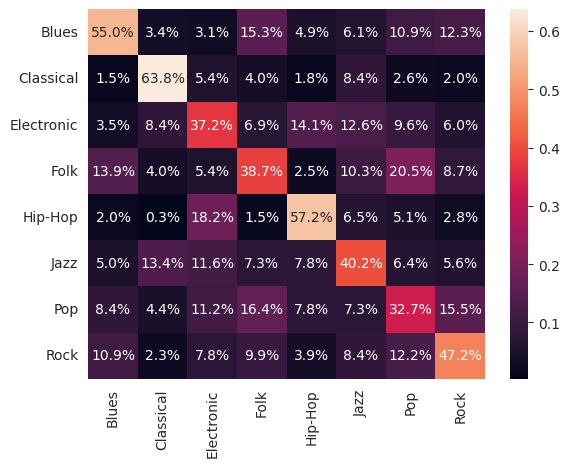

In [41]:
test_loss, test_accuracy, (test_pred, test_true) = evaluate(DEVICE, conv_3_model, test_data_loader, criterion=nn.CrossEntropyLoss(), return_pred=True)

plot_confusion_matrix(test_true, test_pred, idx_to_label, transform_idx_to_label)

 47%|████▋     | 47/100 [02:13<02:30,  2.84s/it]

Early stop!


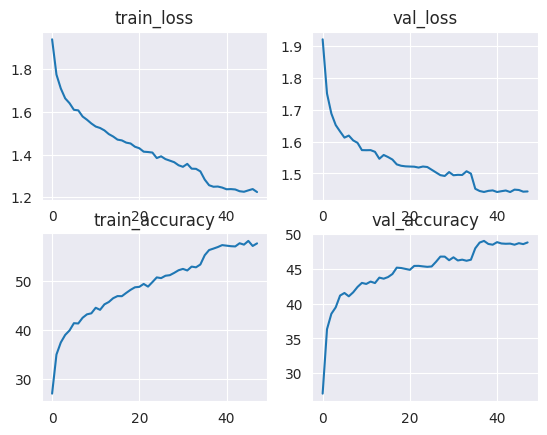

In [44]:
from models.genre_classification.CRNNSimpleModel import CRNNSimpleModel

crnn_model = CRNNSimpleModel(NUM_CLASSES, 40).to(DEVICE)
train_progress, val_progress = executor(DEVICE, crnn_model, train_dataloader = train_data_loader, val_dataloader=val_data_loader, epochs=100, learning_rate=0.0001, weight_decay=0.01, evaluate_per_iteration=10, early_stop_after=(10,  0.01))

plot_metrics(train_progress, val_progress, metrics = ['loss', 'accuracy'])

              precision    recall  f1-score   support

       Blues       0.56      0.40      0.46       249
   Classical       0.62      0.70      0.65       253
  Electronic       0.37      0.41      0.39       249
        Folk       0.35      0.43      0.39       248
     Hip-Hop       0.58      0.67      0.62       252
        Jazz       0.38      0.43      0.40       252
         Pop       0.36      0.22      0.27       235
        Rock       0.45      0.42      0.44       246

    accuracy                           0.46      1984
   macro avg       0.46      0.46      0.45      1984
weighted avg       0.46      0.46      0.46      1984



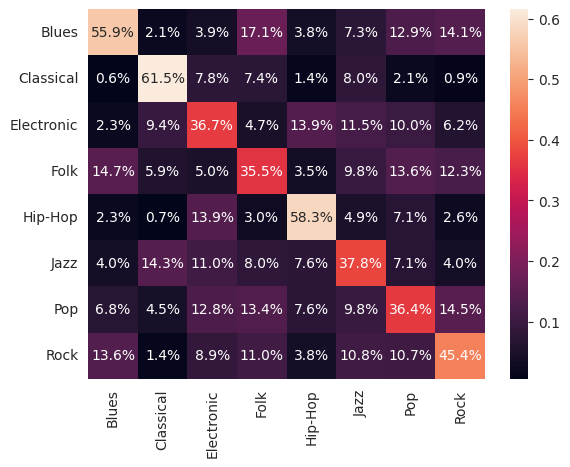

In [46]:
test_loss, test_accuracy, (test_pred, test_true) = evaluate(DEVICE, crnn_model, test_data_loader, criterion=nn.CrossEntropyLoss(), return_pred=True)

plot_confusion_matrix(test_true, test_pred, idx_to_label, transform_idx_to_label)

1


 48%|████▊     | 48/100 [02:10<02:21,  2.72s/it]

Early stop!


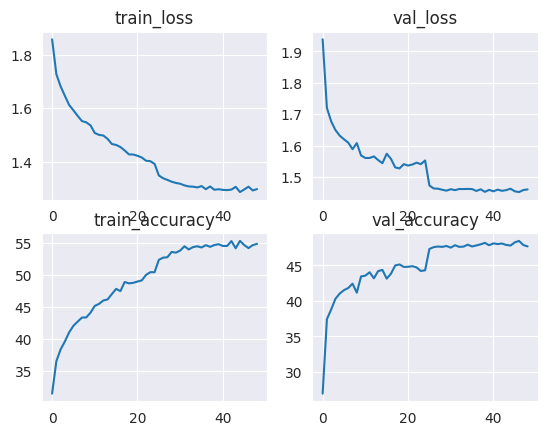

In [52]:
from models.genre_classification.CRNNSimple2Model import CRNNSimple2Model

crnn_model2 = CRNNSimple2Model(NUM_CLASSES, 40).to(DEVICE)
train_progress, val_progress = executor(DEVICE, crnn_model2, train_dataloader = train_data_loader, val_dataloader=val_data_loader, epochs=100, learning_rate=0.0001, weight_decay=0.01, evaluate_per_iteration=10, early_stop_after=(10,  0.001))

plot_metrics(train_progress, val_progress, metrics = ['loss', 'accuracy'])

              precision    recall  f1-score   support

       Blues       0.50      0.45      0.47       249
   Classical       0.67      0.70      0.68       254
  Electronic       0.35      0.38      0.37       250
        Folk       0.39      0.44      0.41       248
     Hip-Hop       0.55      0.68      0.61       251
        Jazz       0.43      0.43      0.43       251
         Pop       0.31      0.17      0.22       234
        Rock       0.45      0.46      0.45       247

    accuracy                           0.47      1984
   macro avg       0.46      0.46      0.46      1984
weighted avg       0.46      0.47      0.46      1984



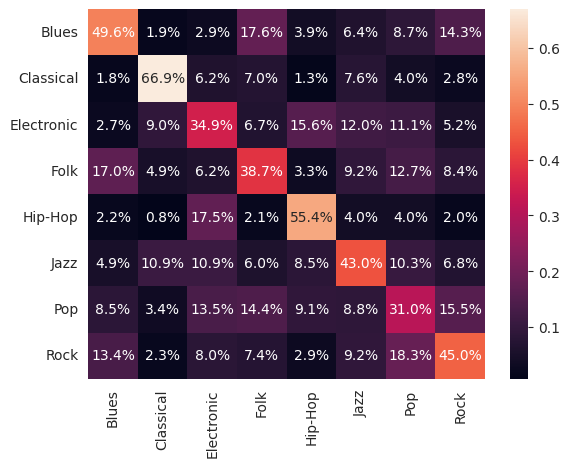

In [53]:
test_loss, test_accuracy, (test_pred, test_true) = evaluate(DEVICE, crnn_model2, test_data_loader, criterion=nn.CrossEntropyLoss(), return_pred=True)

plot_confusion_matrix(test_true, test_pred, idx_to_label, transform_idx_to_label)

  1%|          | 1/100 [00:12<21:15, 12.89s/it]

1.9123511651466634 1.9042591334487982


  2%|▏         | 2/100 [00:25<21:02, 12.88s/it]

1.8333038650710007 1.8330368374899233


  3%|▎         | 3/100 [00:38<20:47, 12.86s/it]

1.8205951813993784 1.8179491101871437


  4%|▍         | 4/100 [00:51<20:35, 12.87s/it]

1.8182456542705667 1.8161088349083052


  5%|▌         | 5/100 [01:04<20:23, 12.88s/it]

1.7985118109604408 1.7952368896677748


  6%|▌         | 6/100 [01:17<20:11, 12.89s/it]

1.7993501235698832 1.7914363434237814


  7%|▋         | 7/100 [01:30<20:00, 12.91s/it]

1.789124319471162 1.791120604985321


  8%|▊         | 8/100 [01:42<19:38, 12.81s/it]

1.7843868510476475 1.7751866955361606


  9%|▉         | 9/100 [01:55<19:20, 12.75s/it]

1.7791457611939003 1.7787090520704947


 10%|█         | 10/100 [02:08<19:04, 12.71s/it]

1.7749265350144485 1.7613551907825031


 11%|█         | 11/100 [02:20<18:43, 12.62s/it]

1.7742923555702999 1.7701913670460745


 12%|█▏        | 12/100 [02:33<18:29, 12.61s/it]

1.7709578423664487 1.7571466067968973


 13%|█▎        | 13/100 [02:45<18:16, 12.60s/it]

1.7632841430861375 1.7582142298122705


 14%|█▍        | 14/100 [02:58<18:04, 12.61s/it]

1.7579359983575755 1.749116561654526


 15%|█▌        | 15/100 [03:10<17:53, 12.63s/it]

1.752959047514817 1.7465967662323456


 16%|█▌        | 16/100 [03:23<17:38, 12.60s/it]

1.752101314478907 1.7408955580627865


 17%|█▋        | 17/100 [03:36<17:24, 12.58s/it]

1.7393365605124111 1.7366616193050615


 18%|█▊        | 18/100 [03:48<17:12, 12.59s/it]

1.7473912419943973 1.7376097696168082


 19%|█▉        | 19/100 [04:01<16:59, 12.58s/it]

1.7404604204769791 1.733113270476117


 20%|██        | 20/100 [04:13<16:45, 12.57s/it]

1.7414836382043772 1.7266781027965283


 21%|██        | 21/100 [04:26<16:32, 12.57s/it]

1.7327271453265487 1.727651994898572


 22%|██▏       | 22/100 [04:38<16:19, 12.56s/it]

1.7261858479730015 1.7214747790916722


 23%|██▎       | 23/100 [04:51<16:09, 12.59s/it]

1.727452274848675 1.7254783934162512


 24%|██▍       | 24/100 [05:04<16:00, 12.64s/it]

1.7308059675940153 1.718836930490309


 25%|██▌       | 25/100 [05:16<15:47, 12.64s/it]

1.717976034098658 1.7180974282976667


 26%|██▌       | 26/100 [05:29<15:34, 12.62s/it]

1.7244648448352156 1.7168703051756056


 27%|██▋       | 27/100 [05:42<15:24, 12.67s/it]

1.7222720203728512 1.7108673868091426


 28%|██▊       | 28/100 [05:54<15:11, 12.65s/it]

1.721739648128378 1.71649390568931


 29%|██▉       | 29/100 [06:07<14:53, 12.59s/it]

1.7279780585190345 1.7257983151668779


 30%|███       | 30/100 [06:19<14:41, 12.59s/it]

1.7266542508684355 1.7220701297856695


 31%|███       | 31/100 [06:32<14:27, 12.58s/it]

1.7262249642405016 1.7166054276277392


 32%|███▏      | 32/100 [06:45<14:17, 12.62s/it]

1.6974733212898518 1.6964130168136915


 33%|███▎      | 33/100 [06:57<14:03, 12.59s/it]

1.6944342391244296 1.6902337093507092


 34%|███▍      | 34/100 [07:10<13:49, 12.57s/it]

1.6956528515651308 1.691938497229106


 35%|███▌      | 35/100 [07:22<13:36, 12.55s/it]

1.6950106357706005 1.69391598157619


 36%|███▌      | 36/100 [07:35<13:23, 12.56s/it]

1.692094403299792 1.690939243762724


 37%|███▋      | 37/100 [07:47<13:11, 12.57s/it]

1.6926134421907622 1.691851993859638


 38%|███▊      | 38/100 [08:00<12:56, 12.52s/it]

1.6986972093582153 1.689620714857831


 39%|███▉      | 39/100 [08:13<12:52, 12.66s/it]

1.693488829711388 1.6880266191223252


 40%|████      | 40/100 [08:26<12:42, 12.71s/it]

1.6921010239370937 1.691004659723027


 41%|████      | 41/100 [08:39<12:35, 12.81s/it]

1.6932585806682192 1.689010879411126


 42%|████▏     | 42/100 [08:52<12:28, 12.90s/it]

1.688382022956322 1.691479087425267


 43%|████▎     | 43/100 [09:05<12:20, 12.99s/it]

1.6933554386270457 1.691251644890429


 44%|████▍     | 44/100 [09:18<12:09, 13.03s/it]

1.6919403569451694 1.6914065378602197


 45%|████▌     | 45/100 [09:31<11:58, 13.06s/it]

1.6914678951789592 1.6904387938262129


 46%|████▌     | 46/100 [09:44<11:36, 12.91s/it]

1.6902288543766943 1.6878975368864524


 47%|████▋     | 47/100 [09:56<11:17, 12.79s/it]

1.6915468610566238 1.6905064901448612


 48%|████▊     | 48/100 [10:09<11:02, 12.74s/it]

1.695643479248573 1.689222846987061


 49%|████▉     | 49/100 [10:22<10:48, 12.72s/it]

1.6933517735579917 1.6871221625859836


 50%|█████     | 50/100 [10:34<10:32, 12.66s/it]

1.6895293901706565 1.6877148832593651


 51%|█████     | 51/100 [10:46<10:08, 12.41s/it]

1.6914289137412761 1.6910889033348329


 52%|█████▏    | 52/100 [10:58<09:57, 12.45s/it]

1.6913796465972375 1.6909249611713917


 53%|█████▎    | 53/100 [11:11<09:47, 12.51s/it]

1.6926933354344862 1.6924965598616182


 53%|█████▎    | 53/100 [11:24<10:06, 12.91s/it]

1.6978953912340362 1.6903568492507055
Early stop!


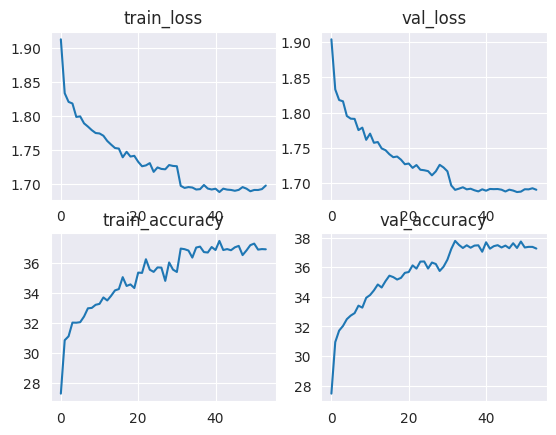

In [11]:
from models.genre_classification.SimpleTransformerModel import TransformerModel

transformer_model = TransformerModel(40, NUM_CLASSES, d_model=128, dim_feedforward=1024, dropout=0).to(DEVICE)
train_progress, val_progress = executor(
    DEVICE,
    transformer_model,
    train_dataloader = train_data_loader,
    val_dataloader=val_data_loader,
    epochs=100,
    learning_rate=0.0001,
    weight_decay=0.01,
    evaluate_per_iteration=10,
    early_stop_after=(15,  0.001),
    print_metrics=True,
    lr_scheduler=lambda optimizer: torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=3, mode='min', factor=0.01),
)

plot_metrics(train_progress, val_progress, metrics = ['loss', 'accuracy'])

              precision    recall  f1-score   support

       Blues       0.36      0.31      0.33       247
   Classical       0.49      0.70      0.58       254
  Electronic       0.26      0.22      0.24       250
        Folk       0.28      0.29      0.28       248
     Hip-Hop       0.42      0.70      0.53       250
        Jazz       0.34      0.22      0.27       252
         Pop       0.32      0.04      0.08       235
        Rock       0.35      0.48      0.40       248

    accuracy                           0.37      1984
   macro avg       0.35      0.37      0.34      1984
weighted avg       0.35      0.37      0.34      1984



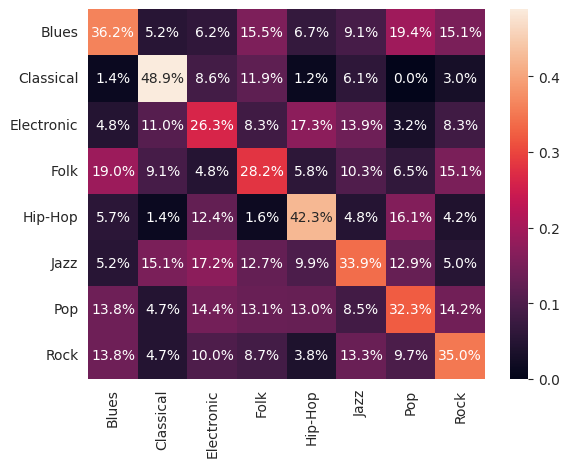

In [12]:
test_loss, test_accuracy, (test_pred, test_true) = evaluate(DEVICE, transformer_model, test_data_loader, criterion=nn.CrossEntropyLoss(), return_pred=True)

plot_confusion_matrix(test_true, test_pred, idx_to_label, transform_idx_to_label)

In [55]:
from models.genre_classification.SimpleTransformerModel2 import TransformerClassifier

transformer_model2 = TransformerClassifier(
    input_dim=40,
    num_layers=6,
    output_dim=NUM_CLASSES,
    num_heads=16,
    dropout=0.1,
    hidden_dim=128
).to(DEVICE)
train_progress, val_progress = executor(
    DEVICE,
    transformer_model2,
    train_dataloader = train_data_loader,
    val_dataloader=val_data_loader,
    epochs=100,
    learning_rate=0.0001,
    weight_decay=0.1,
    evaluate_per_iteration=10,
    early_stop_after=(15,  0.001),
    print_metrics=True
)

plot_metrics(train_progress, val_progress, metrics = ['loss', 'accuracy'])

  1%|          | 1/100 [00:09<15:45,  9.55s/it]

2.0804008138590846 2.071723505373924


  2%|▏         | 2/100 [00:19<15:33,  9.53s/it]

2.000172492553448 1.9950962473170546


  3%|▎         | 3/100 [00:28<15:25,  9.54s/it]

1.923149015985686 1.920217795306087


  4%|▍         | 4/100 [00:38<15:17,  9.56s/it]

1.8942056376358558 1.8854992540750632


  5%|▌         | 5/100 [00:47<15:13,  9.62s/it]

1.8730959990928913 1.8695981958494758


  6%|▌         | 6/100 [00:58<15:26,  9.86s/it]

1.8653542641935676 1.862613169004291


  7%|▋         | 7/100 [01:08<15:33, 10.03s/it]

1.8585569661239099 1.8525789619041475


  8%|▊         | 8/100 [01:20<16:02, 10.46s/it]

1.8491345791981137 1.8491990126772408


  9%|▉         | 9/100 [01:29<15:27, 10.19s/it]

1.8471234165388963 1.8448122987000077


 10%|█         | 10/100 [01:39<15:05, 10.06s/it]

1.8406052194792648 1.8414958449003331


 10%|█         | 10/100 [01:46<15:57, 10.64s/it]


KeyboardInterrupt: 

In [ ]:
test_loss, test_accuracy, (test_pred, test_true) = evaluate(DEVICE, transformer_model2, test_data_loader, criterion=nn.CrossEntropyLoss(), return_pred=True)

plot_confusion_matrix(test_true, test_pred, idx_to_label, transform_idx_to_label)

In [13]:
from models.genre_classification.Conv1PlusModel import Conv1PlusModel

conv_1_plus_model = Conv1PlusModel(NUM_CLASSES, time_size=256, feature_size=40, num_conv_layers=5, num_linear_layers=2).to(DEVICE)
train_progress, val_progress = executor(
    DEVICE,
    conv_1_plus_model,
    train_dataloader = train_data_loader,
    val_dataloader=val_data_loader,
    epochs=100,
    learning_rate=0.0001,
    weight_decay=0.01,
    evaluate_per_iteration=15,
    early_stop_after=(15,  0.01),
    lr_scheduler=lambda optimizer: torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=5, mode='min', factor=0.01),
    print_metrics=True
)

plot_metrics(train_progress, val_progress, metrics = ['loss', 'accuracy'])

  1%|          | 1/100 [00:26<43:18, 26.24s/it]

1.7877673831479304 1.9314789114032596


  2%|▏         | 2/100 [00:52<42:42, 26.15s/it]

1.6991227552808563 1.826050804507348


  3%|▎         | 3/100 [01:18<41:57, 25.95s/it]

1.667591640044903 2.523408745352085


  4%|▍         | 4/100 [01:44<41:32, 25.96s/it]

1.6335712597287935 2.6061643968773573


  5%|▌         | 5/100 [02:09<41:00, 25.90s/it]

1.618517882248451 2.6469991672850854


  5%|▌         | 5/100 [02:13<42:16, 26.70s/it]


KeyboardInterrupt: 

              precision    recall  f1-score   support

       Blues       0.49      0.48      0.48       249
   Classical       0.66      0.72      0.69       254
  Electronic       0.38      0.45      0.41       249
        Folk       0.41      0.38      0.40       247
     Hip-Hop       0.61      0.69      0.65       251
        Jazz       0.42      0.42      0.42       252
         Pop       0.31      0.19      0.24       234
        Rock       0.47      0.48      0.47       248

    accuracy                           0.48      1984
   macro avg       0.47      0.48      0.47      1984
weighted avg       0.47      0.48      0.47      1984



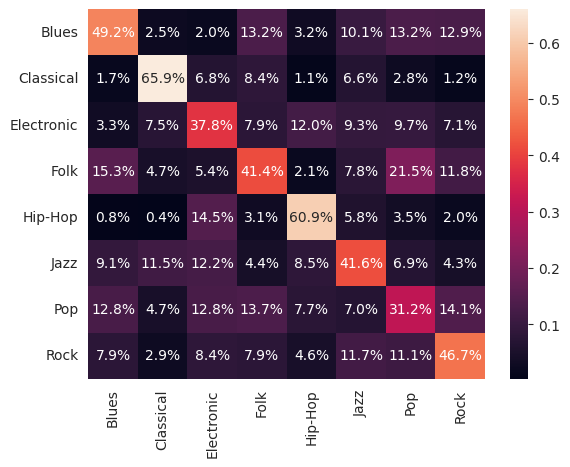

In [9]:
test_loss, test_accuracy, (test_pred, test_true) = evaluate(DEVICE, conv_1_plus_model, test_data_loader, criterion=nn.CrossEntropyLoss(), return_pred=True)

plot_confusion_matrix(test_true, test_pred, idx_to_label, transform_idx_to_label)

In [10]:
import gc
torch.cuda.empty_cache() # PyTorch thing
gc.collect()

20461